# Plot bottleneck distances

## Initialization

In [1]:
# General
import os, glob, time, pickle, re
from copy import deepcopy

# General computation
import numpy as np 
import networkx as nx

# Import from src 
from src.utils import *
from src.tda import *


In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams, font_manager
import seaborn as sns

%matplotlib inline

rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')

# use one of the available styles 
plt.style.use('seaborn-notebook')

# further customization
rcParams['font.family'] = 'FreeSans'
rcParams['font.size'] = 20

rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 20
rcParams['legend.fontsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['axes.linewidth'] = 1
rcParams['lines.linewidth'] = 2 

rcParams['mathtext.fontset'] = 'cm' 
rcParams['mathtext.rm'] = 'serif'
rcParams['figure.dpi'] = 200


## Between `var_info` data and nulls with edge density

In [3]:
!ls data/processed/*bottleneck*

data/processed/pairwise-bottleneck-withedgedensity-corr_dist.pkl
data/processed/pairwise-bottleneck-withedgedensity-var_info.pkl


In [4]:
with open('data/processed/pairwise-bottleneck-withedgedensity-var_info.pkl', 'rb') as f:
    pw_BN = pickle.load(f)['bottleneck_pairwise']

# filter some null models out to look closely at the ones closer to data 
filter_condition = lambda x: 'block' not in x and 'geom-20' not in x 
filtered_ind = np.where([filter_condition(x) for x in pw_BN['B1']['labels']])[0]
label_keys = get_list_at(pw_BN['B1']['labels'],filtered_ind)
num_nulls = np.sum(['block' in x or 'geom' in x for x in label_keys])
num_stim = len(label_keys) - num_nulls
bn_keys = list(pw_BN.keys())

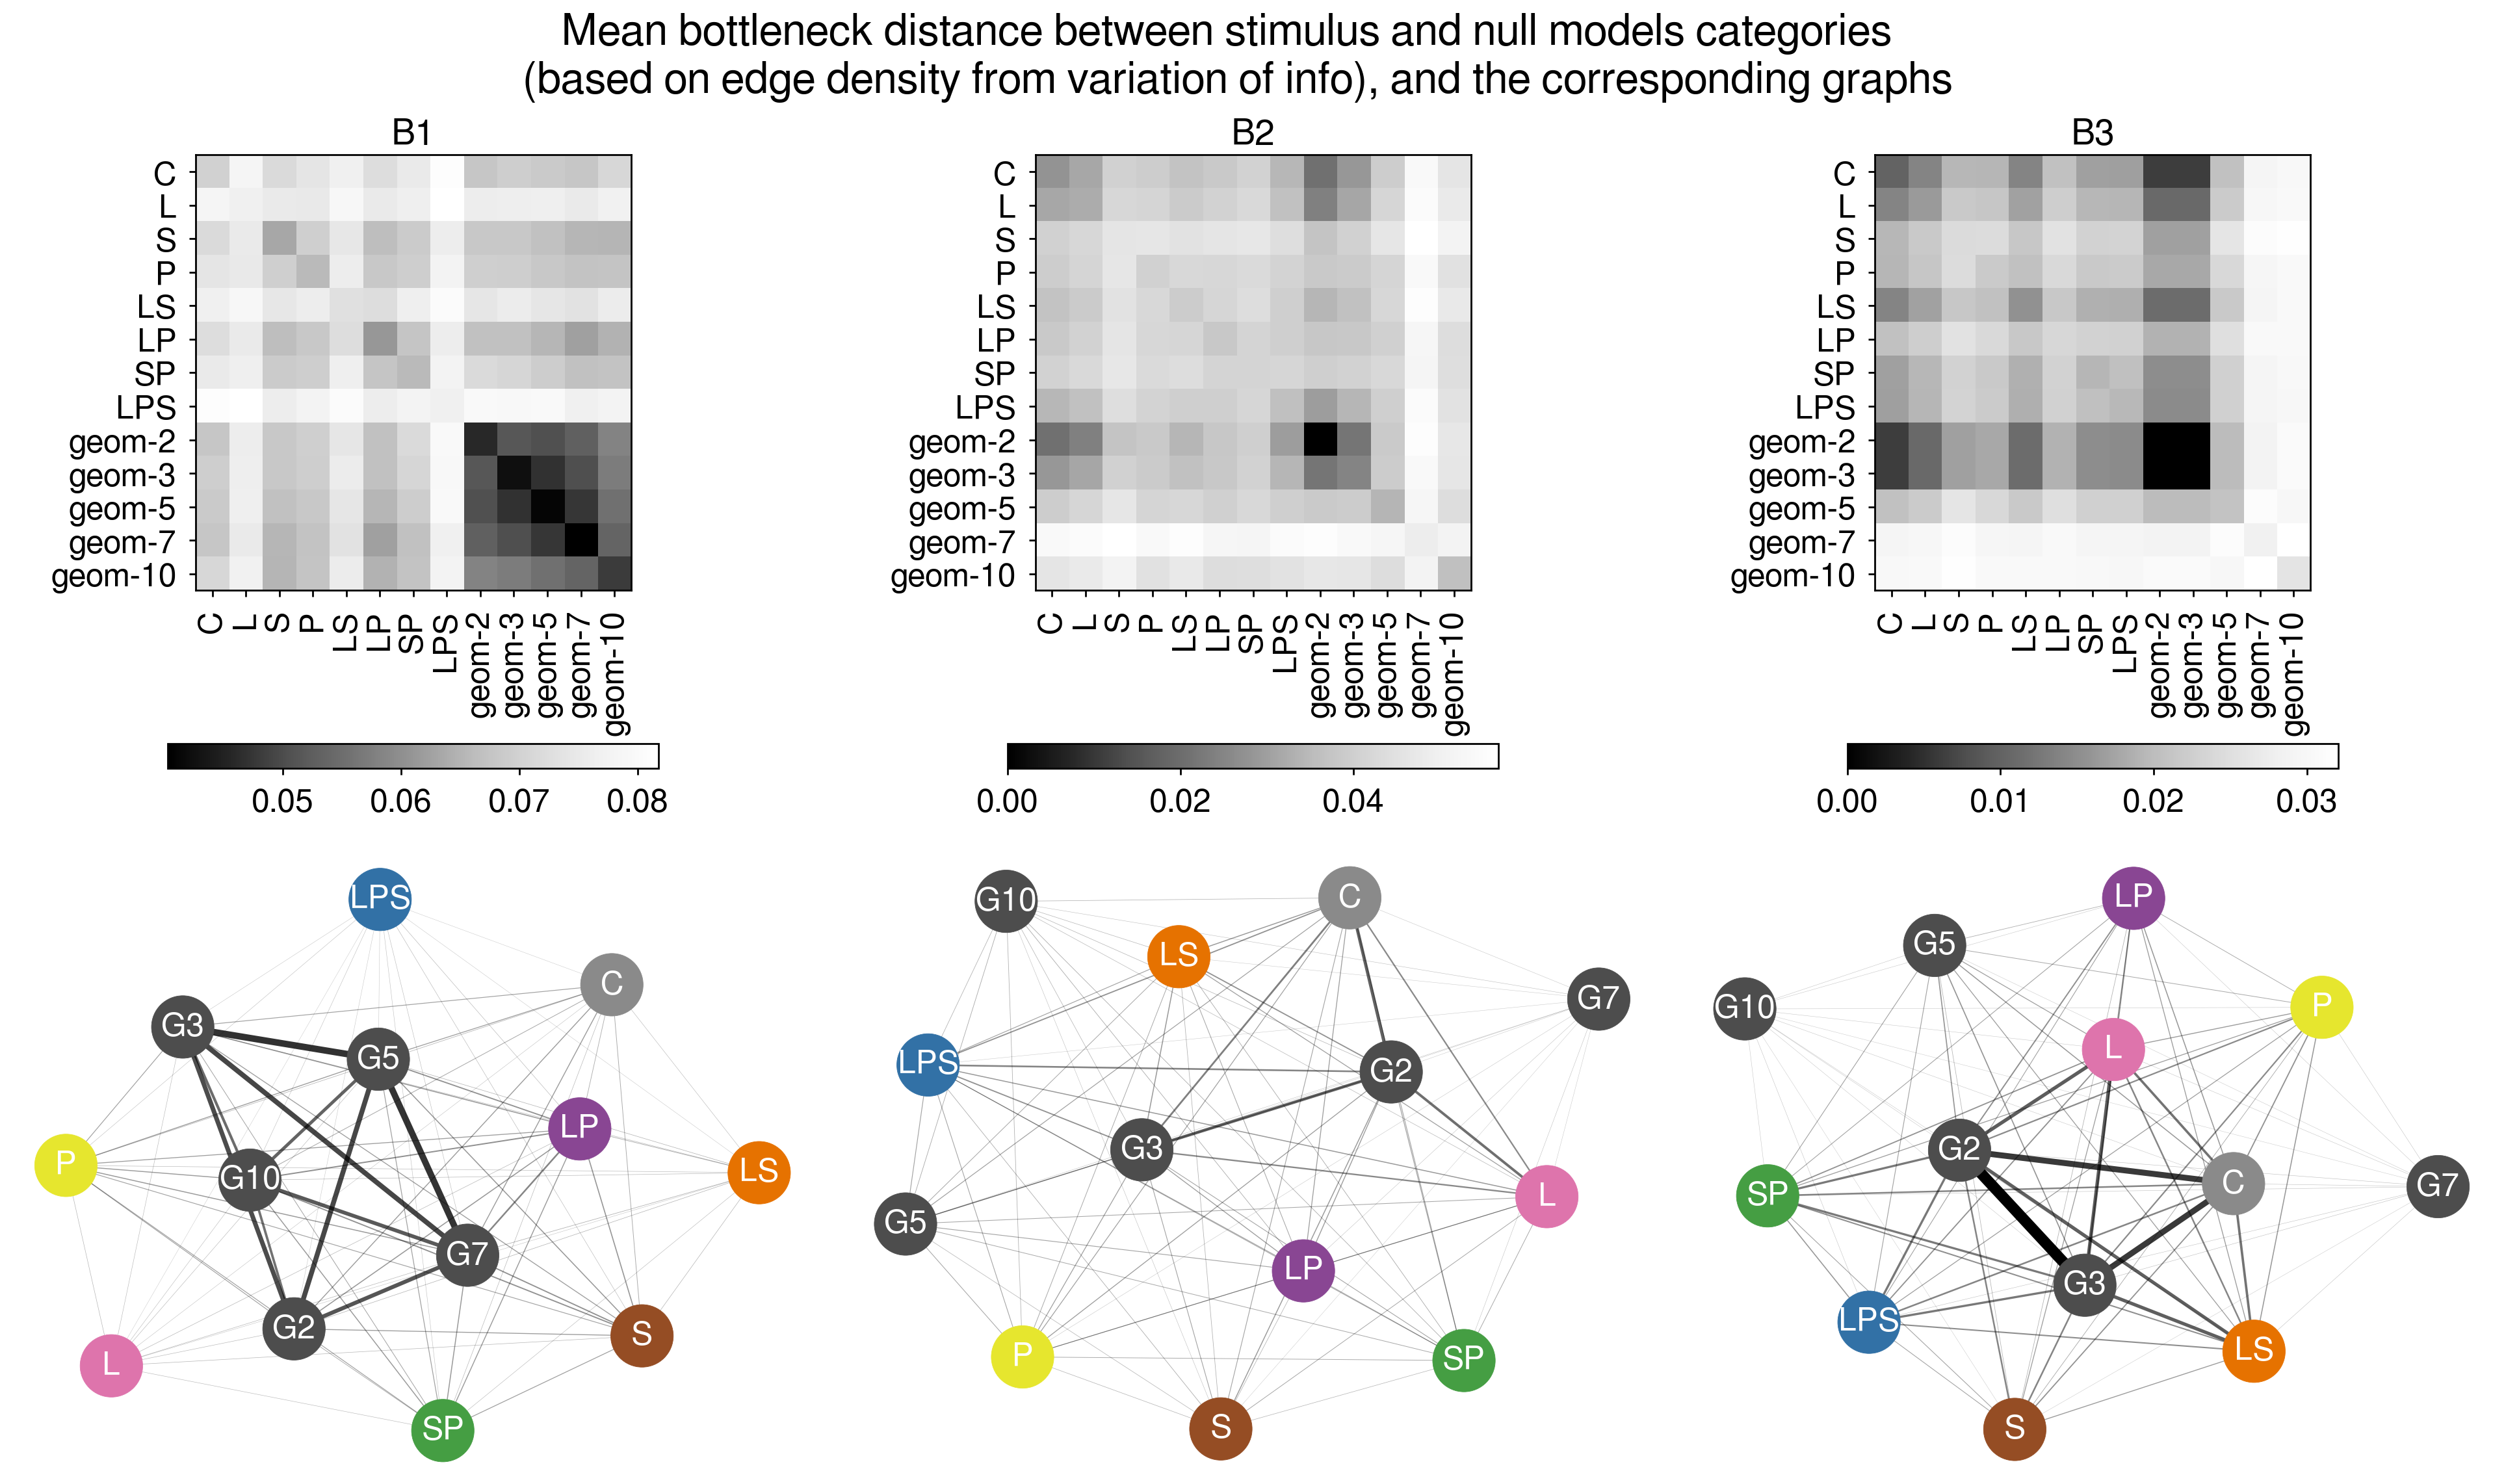

In [7]:
label_pseudoval_vec = np.arange(len(label_keys))
shorten_names = lambda x: re.sub('block-','B-',re.sub('geom-','G',x))
fig = plt.figure(figsize=(20,12))

for i,(k,v) in enumerate(pw_BN.items()):
    plt.subplot2grid((2,len(bn_keys)),loc=(0,i))
    D = v['label_mat'][filtered_ind,:][:,filtered_ind]
    im = plt.imshow(D, cmap='Greys_r')
    plt.title(k)
    plt.xticks(label_pseudoval_vec,labels=label_keys,rotation=90)
    plt.yticks(label_pseudoval_vec,labels=label_keys)
    plt.colorbar(im, fraction=0.04, pad=0.25, orientation='horizontal')
    
    ax = plt.subplot2grid((2,len(bn_keys)),loc=(1,i))
    W = np.exp(1-minmax_norm(D))
    G = nx.Graph(W)
    nodelbl_nx = {i:shorten_names(k) for i,k in enumerate(label_keys)}
    edges = G.edges()

    weights = np.array([G[u][v]['weight'] for u,v in edges])
    edge_width = 0.2+2*(weights-1)**2
    edge_color = plt.get_cmap('Greys')(weights) 
    edge_color[:,-1] = minmax_norm(weights,0.2,1)
    
    node_color = plt.get_cmap('Set1_r')(range(num_stim))
    node_color[:,:-1] *= 0.9
    node_color = np.vstack((node_color, np.tile([0.3,0.3,0.3,1.0],(num_nulls,1))))
    nx.draw_spring(G, 
            width=edge_width,
            node_color=node_color,
            edge_color=edge_color,
            font_size=18,
            node_size=1200,
            font_color='w',font_family='FreeSans',
            labels=nodelbl_nx,with_labels=True)
    ax.set_xlim([1.05*x for x in ax.get_xlim()])
    ax.set_ylim([1.05*y for y in ax.get_ylim()])
    
plt.suptitle('Mean bottleneck distance between stimulus and null models categories \n (based on edge density from variation of info), and the corresponding graphs', y=0.96)
plt.tight_layout()
plt.show()

## Between `var_info` data stimulus categories with actual variation of information distances

In [8]:
with open('data/processed/multisensory-pershom-original-withdist-var_info.pkl', 'rb') as f:
    pw_BN = pickle.load(f)['bottleneck_pairwise']

bn_keys = list(pw_BN.keys())
stim_keys = pw_BN['B1']['labels']
stim_pseudoval_vec = np.arange(len(stim_keys))

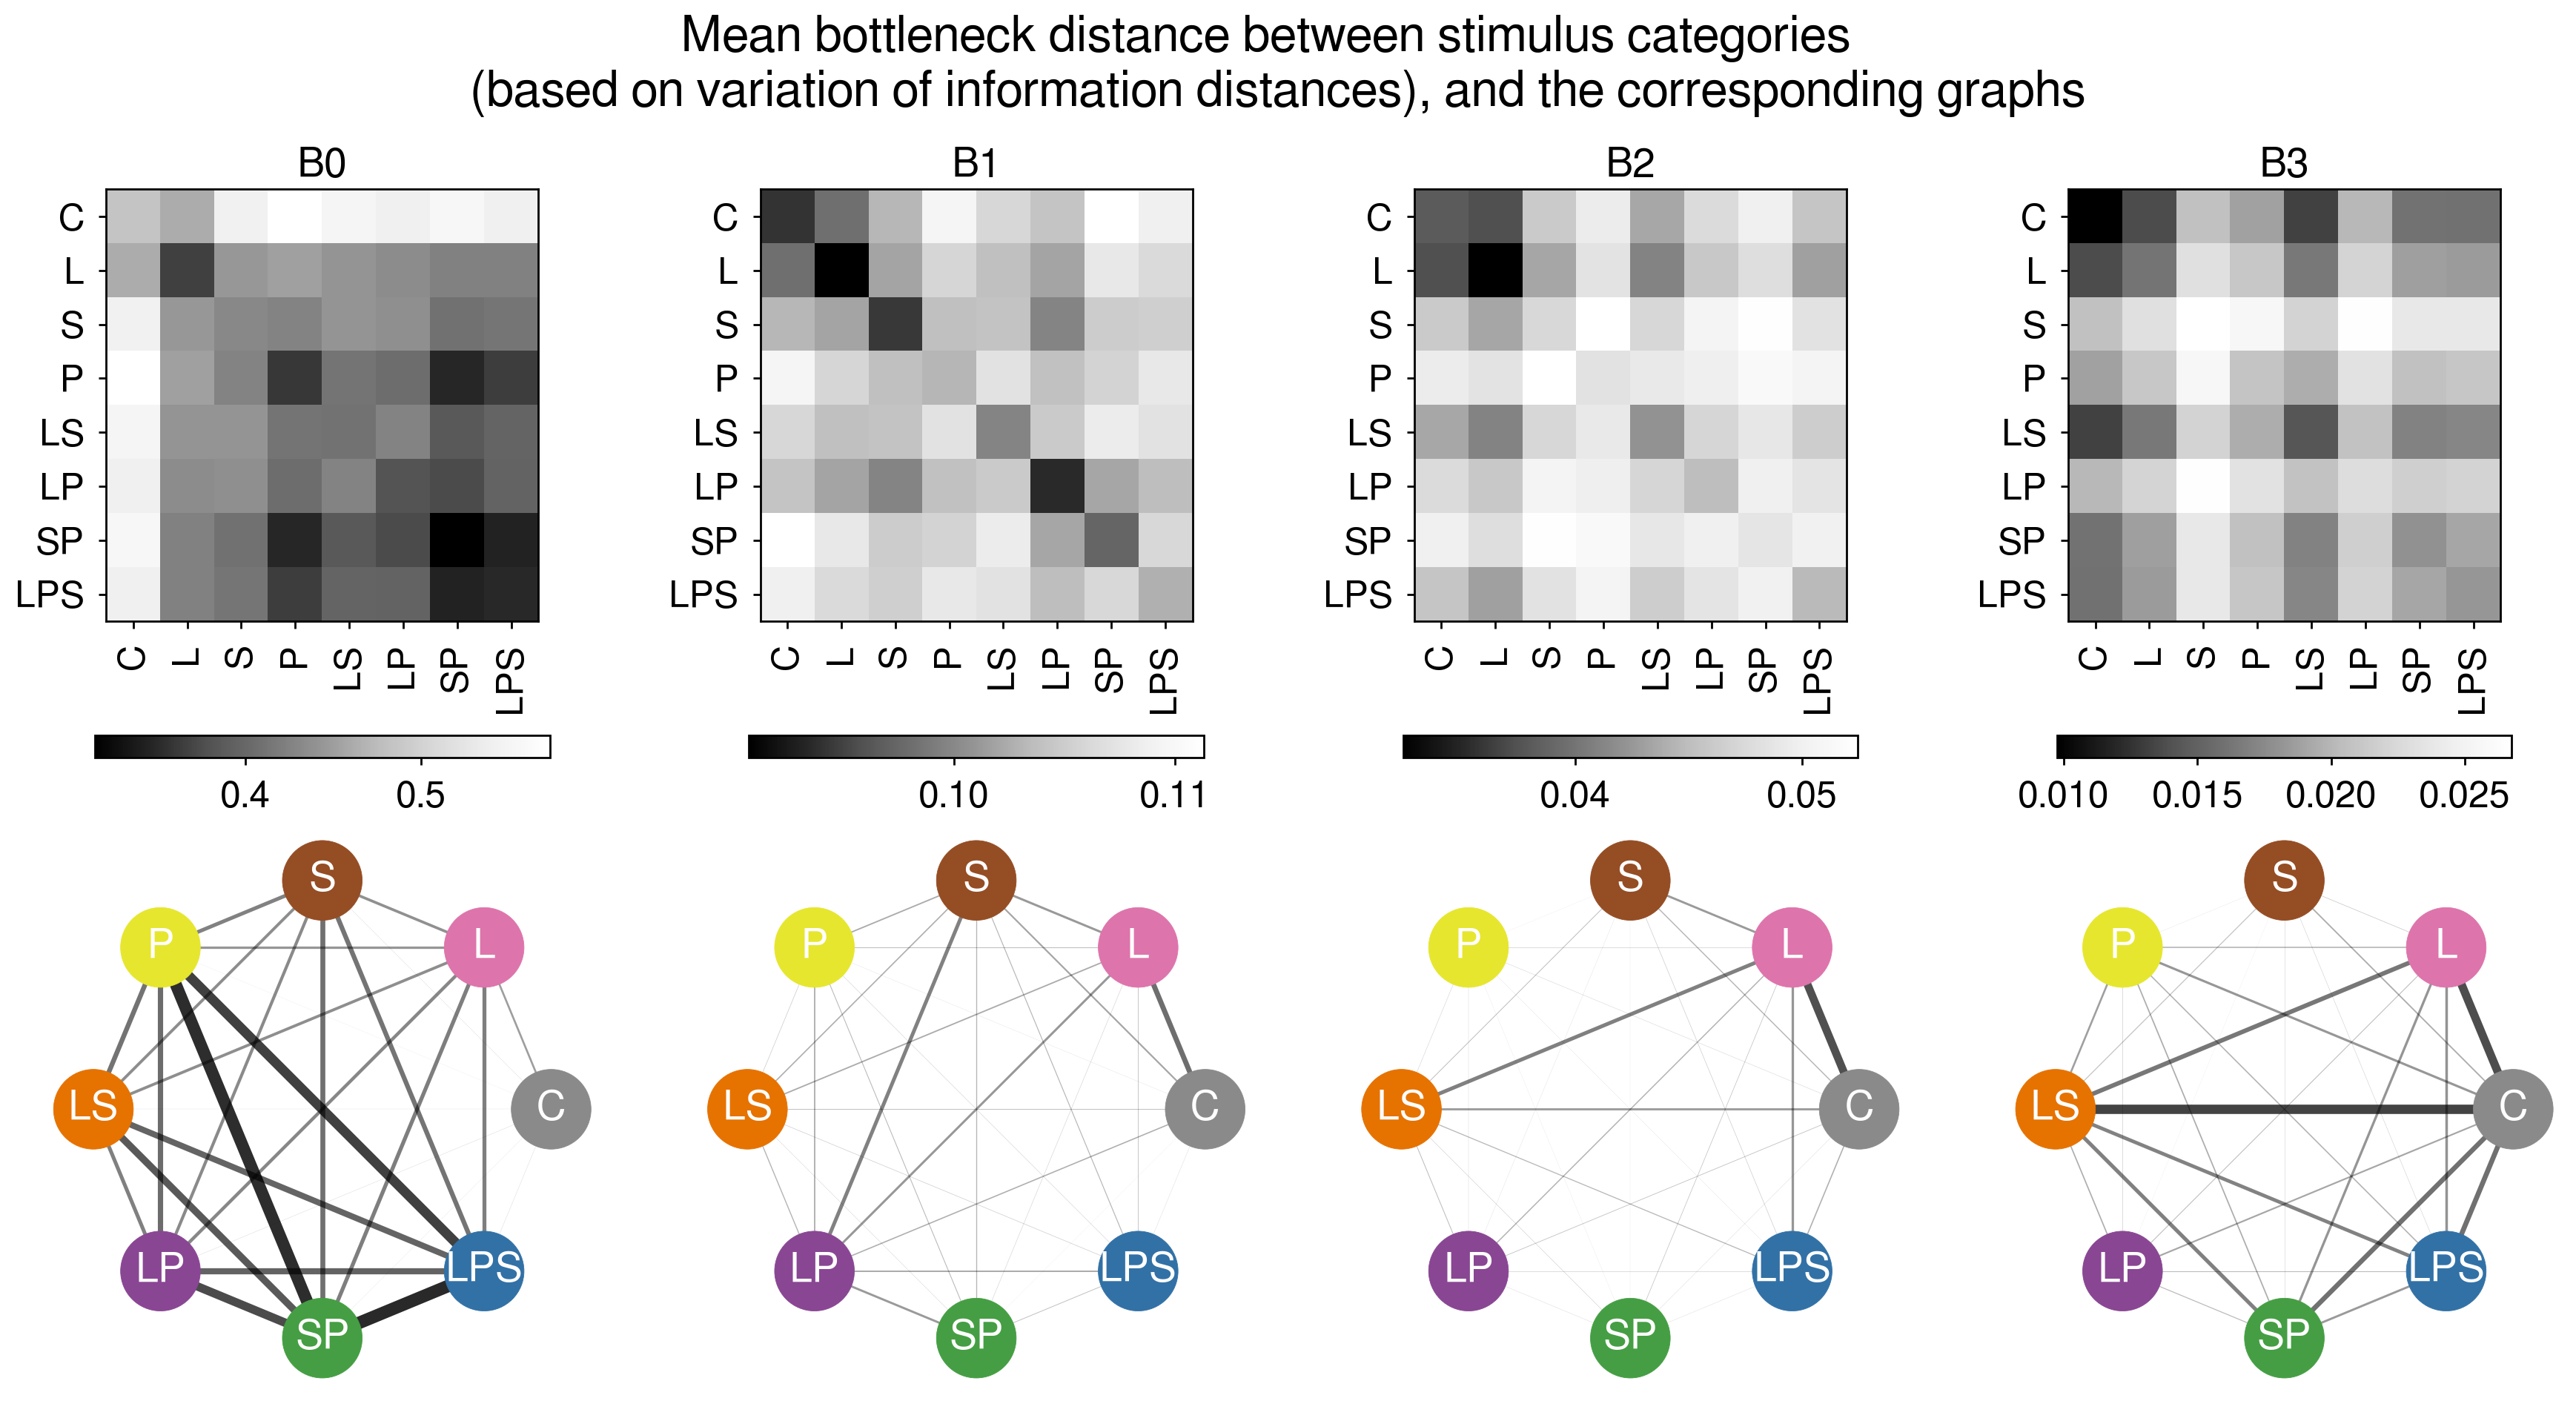

In [9]:
fig = plt.figure(figsize=(18,10))

for i,(k,v) in enumerate(pw_BN.items()):
    plt.subplot2grid((2,len(bn_keys)),loc=(0,i))
    D = v['label_mat']
    im = plt.imshow(D, cmap='Greys_r')
    plt.title(k)
    plt.xticks(stim_pseudoval_vec,labels=stim_keys,rotation=90)
    plt.yticks(stim_pseudoval_vec,labels=stim_keys)
    plt.colorbar(im, fraction=0.04, pad=0.2, orientation='horizontal')
    
    ax = plt.subplot2grid((2,len(bn_keys)),loc=(1,i))
    W = np.exp(1-minmax_norm(D))
    G = nx.Graph(W)
    nodelbl_nx = {i:k for i,k in enumerate(stim_keys)}
    edges = G.edges()

    weights = np.array([G[u][v]['weight'] for u,v in edges])
    edge_width = 0.1+3*(weights-1)**2
    edge_color = plt.get_cmap('Greys')(weights) 
    edge_color[:,-1] = minmax_norm(weights,0.1,1)
    node_color = plt.get_cmap('Set1_r')(range(len(nodelbl_nx)))
    node_color[:,:-1] *= 0.9
    nx.draw_circular(G, 
            width=edge_width,
            node_color=node_color,
            edge_color=edge_color,
            font_size=20,
            node_size=1500,
            font_color='w',font_family='FreeSans',
            labels=nodelbl_nx,with_labels=True)
    ax.set_aspect('equal')
    ax.set_xlim([1.1*x for x in ax.get_xlim()])
    ax.set_ylim([1.1*y for y in ax.get_ylim()])
    
plt.suptitle('Mean bottleneck distance between stimulus categories \n (based on variation of information distances), and the corresponding graphs', y=0.96)
plt.tight_layout()
plt.show()